## PyMongo Retail Example
<br>
*Dataset Fields: _id, Country, CustomerId, Description, InvoiceDate, InvoiceNo, Quantity, StockCode, UnitPrice* 
<br>
<br>
*This example is based on the retail dataset used for the MongoDB slides. Here, we demonstrate the following:*
<br>
*1) Some of the aggregation pipeline framework queries initially demonstrated using MongoDB*
<br>
*2) Converting a MongoDB collection to a python (Pandas) dataframe and using it for further analyses*
<br>
*3) Use of the dataframe for predictive tasks and some visualizations*

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
#Import the pymongo package

import pymongo

In [3]:
import pprint #for pretty printing
import re

In [4]:
from pymongo import MongoClient

In [5]:
#Use MongoClient to connect to the already running mongod server

client = MongoClient('localhost', 27017)

In [6]:
#Database 'MongoExample' and dataset 'retail_for_viz' being selected
#Using the sample retail dataset for this example, but can replicate the same on the larger dataset

db = client['MongoExample']
collection = db['retail_for_viz']
doc_iterator = collection.find()

In [7]:
#Running some basic queries

doc_iterator.count()

C:\Users\Neha Rawat\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  This is separate from the ipykernel package so we can avoid doing imports until


50000

In [8]:
for doc in collection.find().limit(2):
    pprint.pprint (doc)

{'Country': 'United Kingdom',
 'CustomerID': '13394',
 'Description': 'MULTI COLOUR SILVER T-LIGHT HOLDER',
 'InvoiceDate': datetime.datetime(2011, 12, 8, 11, 36),
 'InvoiceNo': '581285',
 'Quantity': 12,
 'StockCode': '84945',
 'UnitPrice': Decimal128('0.85'),
 '_id': ObjectId('5a346cda06177b5b6cc1fc4a')}
{'Country': 'United Kingdom',
 'CustomerID': '15484',
 'Description': 'MAGIC DRAWING SLATE LEAP FROG',
 'InvoiceDate': datetime.datetime(2011, 11, 21, 17, 0),
 'InvoiceNo': '577800',
 'Quantity': 24,
 'StockCode': '22532',
 'UnitPrice': Decimal128('0.42'),
 '_id': ObjectId('5a346cc906177b5b6cc136cb')}


### Replicating queries implemented on Mongo Shell in PyMongo

In [9]:
#Running some of the aggregation pipeline queries demonstrated earlier via Mongo shell

#Distribution on invoices/item transactions by country

pipe = [
    {"$group": {"_id":"$Country", "num_transactions": {"$sum": 1}}}, 
    {'$sort': {'num_transactions': -1}},
    {'$limit': 10}
]
cursor = collection.aggregate(pipeline = pipe)
for doc in cursor:
    pprint.pprint(doc)

{'_id': 'United Kingdom', 'num_transactions': 44304}
{'_id': 'Germany', 'num_transactions': 1150}
{'_id': 'France', 'num_transactions': 1066}
{'_id': 'EIRE', 'num_transactions': 1013}
{'_id': 'Spain', 'num_transactions': 334}
{'_id': 'Netherlands', 'num_transactions': 279}
{'_id': 'Belgium', 'num_transactions': 266}
{'_id': 'Switzerland', 'num_transactions': 244}
{'_id': 'Portugal', 'num_transactions': 193}
{'_id': 'Norway', 'num_transactions': 144}


In [10]:
#Distribution of Quantity of items bought

pipe = [
    {"$match": {"Quantity": {"$gt":1}}}, 
    {"$group":{"_id":"$Quantity", "num_transactions":{"$sum":1}}},
    {"$sort":{"num_transactions":-1}},
    {"$limit":10}
]
cursor = collection.aggregate(pipeline = pipe)
for doc in cursor:
    pprint.pprint(doc)

{'_id': 2, 'num_transactions': 10638}
{'_id': 12, 'num_transactions': 7959}
{'_id': 6, 'num_transactions': 5438}
{'_id': 4, 'num_transactions': 5002}
{'_id': 3, 'num_transactions': 4970}
{'_id': 24, 'num_transactions': 3085}
{'_id': 10, 'num_transactions': 2901}
{'_id': 8, 'num_transactions': 1765}
{'_id': 5, 'num_transactions': 1522}
{'_id': 48, 'num_transactions': 794}


In [11]:
#Minimum, Maximum and Average : Quantity and Unit Price, Minimum and Maximum : Invoice Date

pipe1 = [{"$match": {"Quantity": {"$gt":1}}}, {"$group": {"_id":None, "Quantity_min":{"$min":"$Quantity"}, "Quantity_max":{"$max":"$Quantity"}, "Quantity_mean": {"$avg":"$Quantity"}}}]
pipe2 = [{"$match": {"UnitPrice": {"$gt":0}}}, {"$group": {"_id":None, "UnitPrice_min":{"$min":"$UnitPrice"}, "UnitPrice_max":{"$max":"$UnitPrice"}, "UnitPrice_mean": {"$avg":"$UnitPrice"}}}]
pipe3 = [{"$group": {"_id":None, "Date_min":{"$min":"$InvoiceDate"}, "Date_max":{"$max":"$InvoiceDate"}}}]

cursor1 = collection.aggregate(pipeline = pipe1)
cursor2 = collection.aggregate(pipeline = pipe2)
cursor3 = collection.aggregate(pipeline = pipe3)


In [12]:
for doc in cursor1:
    pprint.pprint(doc)
for doc in cursor2:
    pprint.pprint(doc)
for doc in cursor3:
    pprint.pprint(doc)

{'Quantity_max': 80995,
 'Quantity_mean': 15.12994,
 'Quantity_min': 2,
 '_id': None}
{'UnitPrice_max': Decimal128('275.6'),
 'UnitPrice_mean': Decimal128('2.8137748'),
 'UnitPrice_min': Decimal128('0.04'),
 '_id': None}
{'Date_max': datetime.datetime(2011, 12, 9, 12, 50),
 'Date_min': datetime.datetime(2010, 12, 1, 8, 26),
 '_id': None}


In [13]:
#Top Items bought according to Quantity

pipe = [{"$project": {"_id":0, "Description":1, "Quantity":1, "UnitPrice":1}},{"$sort": {"Quantity": -1}},{"$limit":5}]
cursor = collection.aggregate(pipeline = pipe)
for doc in cursor:
    pprint.pprint(doc)

{'Description': 'PAPER CRAFT , LITTLE BIRDIE',
 'Quantity': 80995,
 'UnitPrice': Decimal128('2.08')}
{'Description': 'PACK OF 12 SKULL TISSUES',
 'Quantity': 2160,
 'UnitPrice': Decimal128('0.25')}
{'Description': 'RABBIT NIGHT LIGHT',
 'Quantity': 2040,
 'UnitPrice': Decimal128('1.79')}
{'Description': 'WHITE HANGING HEART T-LIGHT HOLDER',
 'Quantity': 1930,
 'UnitPrice': Decimal128('2.55')}
{'Description': 'POPCORN HOLDER',
 'Quantity': 1900,
 'UnitPrice': Decimal128('0.72')}


In [14]:
#Text Search to sort countries according to customer transactions of household items

collection.create_index([('Description', pymongo.TEXT)], name='search_index', default_language='english')
pipe = [{"$match": {"$text": {"$search": "KITCHEN BEDROOM MUG DOORMAT PARASOL COFFEE TEA"}}},{"$sortByCount":"$Country"}]
cursor = collection.aggregate(pipeline = pipe)
for doc in cursor:
    pprint.pprint(doc)

'search_index'

{'_id': 'United Kingdom', 'count': 2796}
{'_id': 'Germany', 'count': 96}
{'_id': 'EIRE', 'count': 83}
{'_id': 'France', 'count': 78}
{'_id': 'Spain', 'count': 27}
{'_id': 'Switzerland', 'count': 21}
{'_id': 'Portugal', 'count': 19}
{'_id': 'Belgium', 'count': 18}
{'_id': 'Netherlands', 'count': 16}
{'_id': 'Italy', 'count': 13}
{'_id': 'Channel Islands', 'count': 10}
{'_id': 'Norway', 'count': 9}
{'_id': 'Australia', 'count': 7}
{'_id': 'Cyprus', 'count': 6}
{'_id': 'Austria', 'count': 6}
{'_id': 'Finland', 'count': 6}
{'_id': 'Poland', 'count': 5}
{'_id': 'Israel', 'count': 4}
{'_id': 'Iceland', 'count': 3}
{'_id': 'USA', 'count': 3}
{'_id': 'Singapore', 'count': 2}
{'_id': 'Hong Kong', 'count': 2}
{'_id': 'Malta', 'count': 2}
{'_id': 'Canada', 'count': 2}
{'_id': 'RSA', 'count': 1}
{'_id': 'Lithuania', 'count': 1}
{'_id': 'Greece', 'count': 1}
{'_id': 'European Community', 'count': 1}
{'_id': 'Sweden', 'count': 1}
{'_id': 'Denmark', 'count': 1}
{'_id': 'United Arab Emirates', 'count'

In [15]:
#Bucket aggregation example for Quantity

import math
pipe = [
    {"$match": {"Quantity" : {"$gt" : 1}}}, 
    {"$bucket": 
     {"groupBy" : "$Quantity", 
      "boundaries": [1,10,40,100,math.inf], 
      "default": "no quantity", 
      "output": { "avg_price" : {"$avg" : "$UnitPrice"}, "avg_quantity": {"$avg": "$Quantity"}}
     }
    }
]
cursor = collection.aggregate(pipeline = pipe)
for doc in cursor:
    pprint.pprint(doc)

{'_id': 1,
 'avg_price': Decimal128('3.628205581302303870903210749174807'),
 'avg_quantity': 3.857966858933751}
{'_id': 10,
 'avg_price': Decimal128('1.608607594936708860759493670886076'),
 'avg_quantity': 15.94246260069045}
{'_id': 40,
 'avg_price': Decimal128('1.538571428571428571428571428571429'),
 'avg_quantity': 59.24031007751938}
{'_id': 100,
 'avg_price': Decimal128('1.378453105968331303288672350791717'),
 'avg_quantity': 312.6881851400731}


In [16]:
#Map Reduce in PyMongo : Count of customers per country

from bson.code import Code
mapper = Code("""function(){emit (this.Country, {customers: this.CustomerId});}""")

reducer = Code("""function(key,values){var sum = 0; values.forEach(function (doc){sum = sum + 1;}); return {customers: sum};}""")

In [17]:
result = collection.map_reduce(mapper, reducer, "myresults")
for doc in result.find():
    pprint.pprint (doc)

{'_id': 'Australia', 'value': {'customers': 106.0}}
{'_id': 'Austria', 'value': {'customers': 51.0}}
{'_id': 'Bahrain', 'value': {'customers': None}}
{'_id': 'Belgium', 'value': {'customers': 114.0}}
{'_id': 'Brazil', 'value': {'customers': None}}
{'_id': 'Canada', 'value': {'customers': 20.0}}
{'_id': 'Channel Islands', 'value': {'customers': 89.0}}
{'_id': 'Cyprus', 'value': {'customers': 59.0}}
{'_id': 'Czech Republic', 'value': {'customers': None}}
{'_id': 'Denmark', 'value': {'customers': 44.0}}
{'_id': 'EIRE', 'value': {'customers': 35.0}}
{'_id': 'European Community', 'value': {'customers': 12.0}}
{'_id': 'Finland', 'value': {'customers': 74.0}}
{'_id': 'France', 'value': {'customers': 21.0}}
{'_id': 'Germany', 'value': {'customers': 33.0}}
{'_id': 'Greece', 'value': {'customers': 15.0}}
{'_id': 'Hong Kong', 'value': {'customers': 39.0}}
{'_id': 'Iceland', 'value': {'customers': 37.0}}
{'_id': 'Israel', 'value': {'customers': 29.0}}
{'_id': 'Italy', 'value': {'customers': 75.0}}

*We see that most of the common queries we used on MongoDB can be replicated on PyMongo. Try the 'facet' query and other map reduce queries on PyMongo for practice.*

### Converting MongoDB collection to Pandas dataframe

In [18]:
#Creating final dataset to be converted to a Pandas dataframe

pipe = [
    {"$match": {"$and" : [
        {"Quantity":{"$gt":1}}, 
        {"UnitPrice":{"$gt":0}}, 
        {"Quantity":{"$ne":None}}, 
        {"UnitPrice":{"$ne":None}}, 
        {"Country":{"$ne":"Unspecified"}},
        {"Country":{"$ne":None}},
        {"Description":{"$ne":None}}
    ]}},
    {"$out": "newretail"}
]

In [19]:
cursor = collection.aggregate(pipeline = pipe)
for doc in cursor:
    pprint.pprint(doc)

In [20]:
#Convert into Pandas dataframe. For simple datatypes we can only use 'pd.DataFrame'. In case we want to simplify
#complex nested types like documents please try 'json_normalize' in Pandas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.io.json import json_normalize

retailpd = db['newretail']
df = json_normalize(list(retailpd.find()))
df.head(5)
df.shape

,Country,CustomerID,Description,InvoiceDate,InvoiceNo,Quantity,StockCode,UnitPrice,_id
0,United Kingdom,13394,MULTI COLOUR SILVER T-LIGHT HOLDER,2011-12-08 11:36:00,581285,12,84945,0.85,5a346cda06177b5b6cc1fc4a
1,United Kingdom,15484,MAGIC DRAWING SLATE LEAP FROG,2011-11-21 17:00:00,577800,24,22532,0.42,5a346cc906177b5b6cc136cb
2,United Kingdom,14506,6 RIBBONS RUSTIC CHARM,2010-12-05 14:25:00,537202,14,22077,1.65,5a346c1406177b5b6cb9b8fd
3,United Kingdom,,ENGLISH ROSE GARDEN SECATEURS,2011-09-21 15:34:00,567671,2,47504K,3.29,5a346c9706177b5b6cbf1694
4,United Kingdom,,CANDY HEART HANGING DECORATION,2011-07-12 16:20:00,559817,2,35923,0.83,5a346c7306177b5b6cbda9d8


(50000, 9)

In [21]:
#Checking for null values

df.columns[df.isnull().any()].tolist()

[]

In [22]:
#Checking for structure of data frame

df.dtypes

Country                object
CustomerID             object
Description            object
InvoiceDate    datetime64[ns]
InvoiceNo              object
Quantity                int64
StockCode              object
UnitPrice              object
_id                    object
dtype: object

In [23]:
from bson.decimal128 import Decimal128, create_decimal128_context
import decimal

In [24]:
#Converting data type of UnitPrice from a bson type to float

xnew = df['UnitPrice'].values
vnew = np.empty(len(xnew))
a = 0
for i in xnew:
        vnew[a] = i.to_decimal()
        a = a+1
    
df['price_converted'] = vnew
df.dtypes

Country                    object
CustomerID                 object
Description                object
InvoiceDate        datetime64[ns]
InvoiceNo                  object
Quantity                    int64
StockCode                  object
UnitPrice                  object
_id                        object
price_converted           float64
dtype: object

In [25]:
#Grouping at Invoice No

df_mod = pd.DataFrame(df.groupby(['InvoiceNo', 'Country', 'Description'])['Quantity','price_converted'].sum()).reset_index()
df_mod.head(5)
df_mod.dtypes

,InvoiceNo,Country,Description,Quantity,price_converted
0,536365,United Kingdom,GLASS STAR FROSTED T-LIGHT HOLDER,6,4.25
1,536367,United Kingdom,DOORMAT NEW ENGLAND,4,7.95
2,536367,United Kingdom,POPPY'S PLAYHOUSE BEDROOM,6,2.10
3,536369,United Kingdom,BATH BUILDING BLOCK WORD,3,5.95
4,536375,United Kingdom,GLASS STAR FROSTED T-LIGHT HOLDER,6,4.25


InvoiceNo           object
Country             object
Description         object
Quantity             int64
price_converted    float64
dtype: object

In [26]:
#Label and One Hot Encoding for Country and Description of Items

from sklearn import preprocessing
le1 = preprocessing.LabelEncoder()
item_encod = list(le1.fit_transform(df_mod['Description'].values))
country_encod = pd.get_dummies(df_mod['Country'])
country_encod.head(5)

,Australia,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,Czech Republic,Denmark,...,Portugal,RSA,Saudi Arabia,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [27]:
df_mod['item_encod'] = item_encod
df_mod = pd.concat([df_mod,country_encod],axis=1)
df_mod.head(5)
df_mod.describe()
df_mod.shape

,InvoiceNo,Country,Description,Quantity,price_converted,item_encod,Australia,Austria,Bahrain,Belgium,...,Portugal,RSA,Saudi Arabia,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom
0,536365,United Kingdom,GLASS STAR FROSTED T-LIGHT HOLDER,6,4.25,1146,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,536367,United Kingdom,DOORMAT NEW ENGLAND,4,7.95,808,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,536367,United Kingdom,POPPY'S PLAYHOUSE BEDROOM,6,2.10,2098,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,536369,United Kingdom,BATH BUILDING BLOCK WORD,3,5.95,220,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,536375,United Kingdom,GLASS STAR FROSTED T-LIGHT HOLDER,6,4.25,1146,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


,Quantity,price_converted,item_encod,Australia,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,...,Portugal,RSA,Saudi Arabia,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom
count,49935.000000,49935.000000,49935.000000,49935.000000,49935.000000,49935.000000,49935.000000,49935.000000,49935.000000,49935.000000,...,49935.000000,49935.000000,49935.000000,49935.000000,49935.000000,49935.000000,49935.000000,49935.000000,49935.000000,49935.000000
mean,15.149635,2.817437,1643.629879,0.002583,0.001141,0.000020,0.005327,0.000020,0.000401,0.002183,...,0.003865,0.000180,0.000020,0.000521,0.006669,0.001282,0.004886,0.000481,0.000160,0.885972
std,364.592430,3.706050,893.611398,0.050762,0.033767,0.004475,0.072792,0.004475,0.020009,0.046670,...,0.062050,0.013424,0.004475,0.022813,0.081390,0.035778,0.069732,0.021918,0.012656,0.317849
min,2.000000,0.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.250000,924.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,6.000000,1.790000,1621.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,12.000000,3.750000,2390.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,80995.000000,275.600000,3189.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


(49935, 43)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029357C117F0>]], dtype=object)

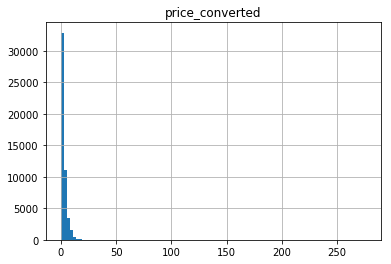

In [28]:
#Try regression to get as close values of price_converted as possible to the original values
#See a distribution of the values of price_converted in the sample dataset -- skewed distribution

df_mod.hist(column = 'price_converted', bins =100)

## Data Analysis using different models

In [29]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from scipy import stats
import pylab as pl
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [30]:
#Dividing into train and test datasets

x_train, x_test, y_train, y_test = train_test_split(
          df_mod.iloc[:,3:44], df_mod['price_converted'].values, test_size=0.10, random_state=42)

In [31]:
x_train = x_train.drop('price_converted',axis = 1)
x_test = x_test.drop('price_converted',axis = 1)
x_train.shape
x_test.shape
x_train.head(5)
x_test.head(5)

(44941, 39)

(4994, 39)

,Quantity,item_encod,Australia,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,...,Portugal,RSA,Saudi Arabia,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom
29156,12,1609,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
20139,16,3076,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
20406,2,2760,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3705,2,1024,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
24381,2,1171,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


,Quantity,item_encod,Australia,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,...,Portugal,RSA,Saudi Arabia,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom
28433,2,812,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
26538,25,3126,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9826,2,3076,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
45331,2,3066,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
44135,3,1881,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [33]:
#Scaled datasets - Preprocessing package can be used to scale attributes if required

from sklearn import preprocessing

#Keeping the scaling parameters from the training dataset to be later applied to the test dataset
train_scaler = preprocessing.StandardScaler().fit(x_train)
train_scaler

x_trains = pd.DataFrame(data = train_scaler.transform(x_train))
x_trains.shape
x_trains.head(10)

x_tests = pd.DataFrame(data = train_scaler.transform(x_test))
x_tests.shape
x_tests.head(10)

StandardScaler(copy=True, with_mean=True, with_std=True)

(44941, 39)

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,-0.008929,-0.039097,-0.050651,-0.033374,-0.004717,-0.074793,-0.004717,-0.020566,-0.046509,-0.037764,...,-0.062703,-0.014153,0.0,-0.022131,-0.082662,-0.036563,-0.069978,-0.021622,-0.012481,0.359009
1,0.001482,1.600276,-0.050651,-0.033374,-0.004717,-0.074793,-0.004717,-0.020566,-0.046509,-0.037764,...,-0.062703,-0.014153,0.0,-0.022131,-0.082662,-0.036563,-0.069978,-0.021622,-0.012481,0.359009
2,-0.034956,1.247146,-0.050651,-0.033374,-0.004717,-0.074793,-0.004717,-0.020566,-0.046509,-0.037764,...,-0.062703,-0.014153,0.0,-0.022131,-0.082662,-0.036563,-0.069978,-0.021622,-0.012481,0.359009
3,-0.034956,-0.692835,-0.050651,-0.033374,-0.004717,-0.074793,-0.004717,-0.020566,-0.046509,-0.037764,...,-0.062703,-0.014153,0.0,-0.022131,-0.082662,-0.036563,-0.069978,-0.021622,-0.012481,0.359009
4,-0.034956,-0.528562,-0.050651,-0.033374,-0.004717,-0.074793,-0.004717,-0.020566,-0.046509,-0.037764,...,-0.062703,-0.014153,0.0,-0.022131,-0.082662,-0.036563,-0.069978,-0.021622,-0.012481,0.359009
5,-0.024545,-0.669367,-0.050651,-0.033374,-0.004717,-0.074793,-0.004717,-0.020566,-0.046509,-0.037764,...,-0.062703,-0.014153,0.0,-0.022131,-0.082662,-0.036563,-0.069978,-0.021622,-0.012481,0.359009
6,-0.008929,-0.988972,-0.050651,-0.033374,-0.004717,-0.074793,-0.004717,-0.020566,-0.046509,-0.037764,...,-0.062703,-0.014153,0.0,-0.022131,-0.082662,-0.036563,-0.069978,-0.021622,-0.012481,0.359009
7,0.022304,-1.742167,-0.050651,-0.033374,-0.004717,-0.074793,-0.004717,-0.020566,-0.046509,-0.037764,...,-0.062703,-0.014153,0.0,-0.022131,-0.082662,-0.036563,-0.069978,-0.021622,-0.012481,0.359009
8,-0.029751,0.970006,-0.050651,-0.033374,-0.004717,-0.074793,-0.004717,-0.020566,-0.046509,-0.037764,...,-0.062703,-0.014153,0.0,-0.022131,12.097419,-0.036563,-0.069978,-0.021622,-0.012481,-2.785448
9,-0.034956,0.597878,-0.050651,-0.033374,-0.004717,-0.074793,-0.004717,-0.020566,-0.046509,-0.037764,...,-0.062703,-0.014153,0.0,-0.022131,-0.082662,-0.036563,-0.069978,-0.021622,-0.012481,0.359009


(4994, 39)

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,-0.034956,-0.929745,-0.050651,-0.033374,-0.004717,-0.074793,-0.004717,-0.020566,-0.046509,-0.037764,...,-0.062703,-0.014153,0.0,-0.022131,-0.082662,-0.036563,-0.069978,-0.021622,-0.012481,0.359009
1,0.024907,1.656151,-0.050651,-0.033374,-0.004717,-0.074793,-0.004717,-0.020566,-0.046509,-0.037764,...,-0.062703,-0.014153,0.0,-0.022131,-0.082662,-0.036563,-0.069978,-0.021622,-0.012481,0.359009
2,-0.034956,1.600276,-0.050651,-0.033374,-0.004717,-0.074793,-0.004717,-0.020566,-0.046509,-0.037764,...,-0.062703,-0.014153,0.0,-0.022131,-0.082662,-0.036563,-0.069978,-0.021622,-0.012481,0.359009
3,-0.034956,1.589101,-0.050651,-0.033374,-0.004717,-0.074793,-0.004717,-0.020566,-0.046509,-0.037764,...,-0.062703,-0.014153,0.0,-0.022131,-0.082662,-0.036563,-0.069978,-0.021622,-0.012481,0.359009
4,-0.032354,0.264863,-0.050651,-0.033374,-0.004717,-0.074793,-0.004717,-0.020566,-0.046509,-0.037764,...,-0.062703,-0.014153,0.0,-0.022131,-0.082662,-0.036563,-0.069978,-0.021622,-0.012481,0.359009
5,0.022304,-1.511962,-0.050651,-0.033374,-0.004717,-0.074793,-0.004717,-0.020566,-0.046509,-0.037764,...,-0.062703,-0.014153,0.0,-0.022131,-0.082662,-0.036563,-0.069978,-0.021622,-0.012481,0.359009
6,-0.032354,-1.573425,-0.050651,-0.033374,-0.004717,-0.074793,-0.004717,-0.020566,-0.046509,-0.037764,...,-0.062703,-0.014153,0.0,-0.022131,-0.082662,-0.036563,-0.069978,-0.021622,-0.012481,0.359009
7,-0.034956,1.316431,-0.050651,-0.033374,-0.004717,-0.074793,-0.004717,-0.020566,-0.046509,-0.037764,...,-0.062703,-0.014153,0.0,-0.022131,-0.082662,-0.036563,-0.069978,-0.021622,-0.012481,0.359009
8,0.022304,0.548708,-0.050651,-0.033374,-0.004717,-0.074793,-0.004717,-0.020566,-0.046509,-0.037764,...,-0.062703,-0.014153,0.0,-0.022131,-0.082662,-0.036563,-0.069978,-0.021622,-0.012481,0.359009
9,0.024907,1.678501,-0.050651,-0.033374,-0.004717,-0.074793,-0.004717,-0.020566,-0.046509,-0.037764,...,-0.062703,-0.014153,0.0,-0.022131,-0.082662,-0.036563,-0.069978,-0.021622,-0.012481,0.359009


### Linear Regression

In [34]:
linmodel = LinearRegression()
linmodel.fit(x_train, y_train)
lin_preds = linmodel.predict(x_test)
print(lin_preds)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

[ 2.74447565  2.80708138  2.8080274  ...,  2.78888328  2.77270826
  3.20521676]


In [35]:
print ("Mean Squared Error:",metrics.mean_squared_error(y_test,lin_preds))
print ("R2 Score:",metrics.r2_score(y_test,lin_preds))
print ("Accuracy:",metrics.accuracy_score(np.round(y_test),np.round(lin_preds)))

Mean Squared Error: 11.2414606152
R2 Score: 0.00422180209671
Accuracy: 0.107128554265


### Polynomial Regression

In [38]:
polymodel = Pipeline([('poly', PolynomialFeatures(degree=2)),
                   ('linear', LinearRegression(fit_intercept=True))])
polymodel = polymodel.fit(x_train.values, y_train)
poly_preds = polymodel.predict(x_test.values)
print(poly_preds)

[ 2.83937007  2.72741553  2.87886495 ...,  2.87061483  2.73137537
  3.19758358]


In [39]:
print ("Mean Squared Error:",metrics.mean_squared_error(y_test,poly_preds))
print ("R2 Score:",metrics.r2_score(y_test,poly_preds))
print ("Accuracy:",metrics.accuracy_score(np.round(y_test),np.round(poly_preds)))

Mean Squared Error: 11.5519235917
R2 Score: -0.0232792739467
Accuracy: 0.116740088106


### K-Nearest Neighbors

In [40]:
knnmod = KNeighborsRegressor(n_neighbors = 12, algorithm = 'ball_tree', leaf_size=1000, metric='manhattan',p=3,n_jobs=-1)
knnmod.fit(x_train, y_train)
knn_preds = knnmod.predict(x_test)
print(knn_preds)

KNeighborsRegressor(algorithm='ball_tree', leaf_size=1000, metric='manhattan',
          metric_params=None, n_jobs=-1, n_neighbors=12, p=3,
          weights='uniform')

[ 8.          0.39333333  6.7        ...,  3.295       3.74        4.95      ]


In [41]:
print ("Mean Squared Error:",metrics.mean_squared_error(y_test,knn_preds))
print ("R2 Score:",metrics.r2_score(y_test,knn_preds))
print ("Accuracy:",metrics.accuracy_score(np.round(y_test),np.round(knn_preds)))

Mean Squared Error: 4.8134044178
R2 Score: 0.573624519002
Accuracy: 0.576091309571


### Random Forest

In [42]:
rdforest = RandomForestRegressor(max_features= 'log2' ,n_estimators=6,criterion='mse',min_samples_leaf=2, 
                                  oob_score=True, n_jobs=-1, random_state=0)
rdforest.fit(x_train, y_train)
rdpreds = rdforest.predict(x_test)
print(rdpreds)

C:\Users\Neha Rawat\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='log2', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=6, n_jobs=-1,
           oob_score=True, random_state=0, verbose=0, warm_start=False)

[ 8.01704137  0.46501046  6.78635317 ...,  3.89644444  3.19666667
  3.87644925]


In [43]:
print ("Mean Squared Error:",metrics.mean_squared_error(y_test,rdpreds))
print ("R2 Score:",metrics.r2_score(y_test,rdpreds))
print ("Accuracy:",metrics.accuracy_score(np.round(y_test),np.round(rdpreds)))

Mean Squared Error: 4.64223468074
R2 Score: 0.588786880739
Accuracy: 0.552663195835


### Neural Network (Multi-Layer Perceptron)

In [44]:
clfmlp = MLPRegressor(activation='tanh', alpha=0.00001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)
clfmlp.fit(x_trains, y_train)
mlp_preds = clfmlp.predict(x_tests)
print(mlp_preds)

MLPRegressor(activation='tanh', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

[ 3.65712391  2.10547986  3.58697203 ...,  3.37284873  2.08702805
  3.1119783 ]


In [45]:
print ("Mean Squared Error:",metrics.mean_squared_error(y_test,rdpreds))
print ("R2 Score:",metrics.r2_score(y_test,rdpreds))
print ("Accuracy:",metrics.accuracy_score(np.round(y_test),np.round(rdpreds)))

Mean Squared Error: 4.64223468074
R2 Score: 0.588786880739
Accuracy: 0.552663195835


*We see that most of the models return accuracies in the range 50-60% and mean squared errors or around 4-5. This can be improved through better model design, cross validation, grid search and randomized search approaches. Also, the encoding of categorical variables can be done differently - (assign different categories to items and countries based on domain knowledge, try feature engineering, leave out scaling of one hot variables and observe) and the data size can be increased, with more relevant attributes.*
<br>
<br>
*The example provides a tutorial of the different models that can be explored and different feature engineering and processing methods that can be used. However, feel free to explore further into predictive modeling for regression and classification in Python to build better models.*